<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Import the class I plan to use
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# Import the dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Create a DataFrame for both parts of data
# assign column names
# Create X and y variable to stores the feature matrix and response from the Boston data.
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [6]:
# Create a data frame of all columns
df = pd.concat([y, X], axis=1)
df.head(1)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [7]:
# check to see all columns are integers
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
# check for null values
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
# there are no data problems to clean up for this exercise

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [10]:
# Check for correlation
df.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


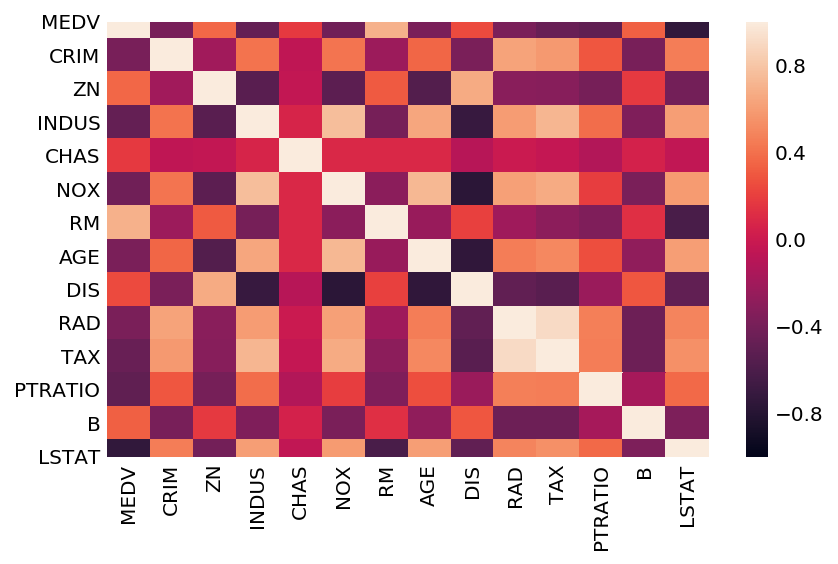

In [11]:
# Check heatmap
sns.set_palette("coolwarm", 7)
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [12]:
# Select variables based off strengh of correlation MEDV (Media Value)
# LSTAT PTRATIO RM
# Lower Status of the population  Pupil Student Ratio   Average number of rooms

In [13]:
# Assign a new variable to the slected variables 
feature_cols = ['LSTAT', 'PTRATIO', 'RM']

In [14]:
# Import additional packages
import csv
from sklearn import metrics

In [15]:
# Set X and y
X = df[feature_cols]
y = df.MEDV

In [16]:
# Create a function for changing the percentage split
def train_test_mse(split):
    # Execute the split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= split, random_state=123)
    # Instantiate the estimator
    linreg = LinearRegression()
    # Fit the model
    linreg.fit(X_train, y_train)
    # Predict the response
    y_pred = linreg.predict(X_test)
    #residual_arr = [[y_test], [y_pred]]
    return metrics.mean_squared_error(y_test, y_pred)#, residual_arr

In [17]:
# Pass an argument into the function 
# Split is 50/50
print(train_test_mse(0.5))

28.5239384757909


In [18]:
# I am not sure what to plot against Y_pred as I used multiple features for X_test 

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [19]:
# Pass an argument into the function 
# Split is 50/50
print('MSE for 50/50 split: {}'.format(train_test_mse(0.5)))
print('MSE for 70/30 split: {}'.format(train_test_mse(0.7)))
print('MSE for 90/10 split: {}'.format(train_test_mse(0.9)))
print('The MSE increases as the split percentage is increased')

MSE for 50/50 split: 28.5239384757909
MSE for 70/30 split: 29.1007830661026
MSE for 90/10 split: 30.873467515685057
The MSE increases as the split percentage is increased


### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [20]:
# Import the class
from sklearn import model_selection

In [21]:
# Instantiate the estimate
# Define the number of splits (in this case 5)
kf = model_selection.KFold(n_splits=5, shuffle=True)
type(kf)

sklearn.model_selection._split.KFold

In [22]:
# Loop to calculate the MSEs of a K-Fold 
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 28.919580264051604
Model 2
MSE: 41.95523646760009
Model 3
MSE: 23.1761660459436
Model 4
MSE: 15.265337507856959
Model 5
MSE: 34.015738855242546
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 28.666411828138962


In [23]:
# What seems optimal? 
# Model 4 is the most representative as the MSE is closest to the mean of MSEs

In [24]:
# How do your scores vary?
# They oscillate a lot

In [25]:
# Instantiate the estimate
# Define the number of splits (in this case 10)
kf = model_selection.KFold(n_splits=10, shuffle=True)
type(kf)

sklearn.model_selection._split.KFold

In [26]:
# Loop to calculate the MSEs of a K-Fold 
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 33.19260184062076
Model 2
MSE: 18.892398512617746
Model 3
MSE: 19.59633147984988
Model 4
MSE: 27.708684510639017
Model 5
MSE: 21.59396311761093
Model 6
MSE: 48.769271635911494
Model 7
MSE: 47.30600471487506
Model 8
MSE: 14.750710105329336
Model 9
MSE: 18.89699190950249
Model 10
MSE: 24.417790816349793
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 27.51247486433065


In [27]:
# There is increased variability in the MSEs as the sample sizes are smaller. s

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [28]:
# Import Itertools
from itertools import combinations

In [29]:
# Use Itertools to create all combinations of two fatures taken from a four feature set
list(combinations(['LSTAT', 'PTRATIO', 'RM', 'AGE'],2))

[('LSTAT', 'PTRATIO'),
 ('LSTAT', 'RM'),
 ('LSTAT', 'AGE'),
 ('PTRATIO', 'RM'),
 ('PTRATIO', 'AGE'),
 ('RM', 'AGE')]

In [30]:
# Extract left and right results by index and create two additionial lists
list1 = [i[0] for i in list(combinations(['LSTAT', 'PTRATIO', 'RM', 'AGE'],2))]
list2 = [i[1] for i in list(combinations(['LSTAT', 'PTRATIO', 'RM', 'AGE'],2))]
print(list1) 
print(list2)

['LSTAT', 'LSTAT', 'LSTAT', 'PTRATIO', 'PTRATIO', 'RM']
['PTRATIO', 'RM', 'AGE', 'RM', 'AGE', 'AGE']


In [31]:
# Create a loop to pass features from each rown into a function that can be expanded out to execute a train/test/split function for each combination
# first stage of loop 

count = 1
a = -1 
b = []

while count < 7:
    b.append (a + count)
    arg = a + count
    def function (arg):
        list1[arg]
        list2[arg]
    count += 1
print(b) 
print(list1)

[0, 1, 2, 3, 4, 5]
['LSTAT', 'LSTAT', 'LSTAT', 'PTRATIO', 'PTRATIO', 'RM']


In [32]:
# Started work to try and get the lists passed into a function but was unable to get this to work in time
count = 1
a = -1 
b = []

while count < 7:
    b.append (a + count)
    arg = a + count
    def function (i,j):
        X = df[i,j]
        y = df.MEDV
    
        # Execute the split  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.75, random_state=123)
        # Instantiate the estimator
        linreg = LinearRegression()
        # Fit the model
        linreg.fit(X_train, y_train)
        # Predict the response
        y_pred = linreg.predict(X_test)
        #residual_arr = [[y_test], [y_pred]]
        return np.sqrt(metrics.mean_squared_error(y_test, y_pred))#, residual_arr
    count += 1
function (list1, list2)
print(b) 
print(list1)

TypeError: '(['LSTAT', 'LSTAT', 'LSTAT', 'PTRATIO', 'PTRATIO', 'RM'], ['PTRATIO', 'RM', 'AGE', 'RM', 'AGE', 'AGE'])' is an invalid key

### 5.1 Can you explain what could be wrong with this approach?

In [33]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [34]:
# Import
import patsy

In [35]:
# Check the data set and format
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
# The percentage of lower status in a town is correlated to the per capita crime rate in the town and the average number of rooms per dwelling
y, X = patsy.dmatrices("LSTAT ~ CRIM + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

27.093729724229433
23.75679952289316
